## Importing necessary libraries

In [29]:
import numpy as np
import pandas as pd
# Needed for plotting
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
# Needed for generating training and testing datasets
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score


## Setting up working directory

In [70]:
%cd C:/Users/Ujjwa/OneDrive/Desktop/BDA/Semester 2/CDS/CDS Assignment/Assignment 3/new

C:\Users\Ujjwa\OneDrive\Desktop\BDA\Semester 2\CDS\CDS Assignment\Assignment 3\new


In [74]:
ls

 Volume in drive C is Windows
 Volume Serial Number is EA1C-322F

 Directory of C:\Users\Ujjwa\OneDrive\Desktop\BDA\Semester 2\CDS\CDS Assignment\Assignment 3\new

17-03-2022  20:12    <DIR>          .
17-03-2022  20:08    <DIR>          ..
17-03-2022  20:11            55,628 insurance.csv
               1 File(s)         55,628 bytes
               2 Dir(s)  163,132,076,032 bytes free


## Reading the excel file

In [75]:
data = pd.read_csv('insurance.csv')

## Some info about the file

In [76]:
print('Dimension of the data = ',data.shape)

Dimension of the data =  (1338, 7)


### Selecting the numerical type columns

In [77]:
data1=data.select_dtypes(include=np.number)

### Counting Null values per column

In [78]:
data1.isna().sum()

age         0
bmi         0
children    0
charges     0
dtype: int64

### Removing NA Values

In [79]:
df =data1.dropna()
#d.isna().sum()#d.isna().sum()

In [105]:
df

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [106]:
def stand(x):
    return (x- np.mean(x))/np.std(x)

In [108]:
df2=df.apply(stand,axis=1)

## Create correlation matrix and the heatmap 

Text(0.5, 1.0, 'Correlations')

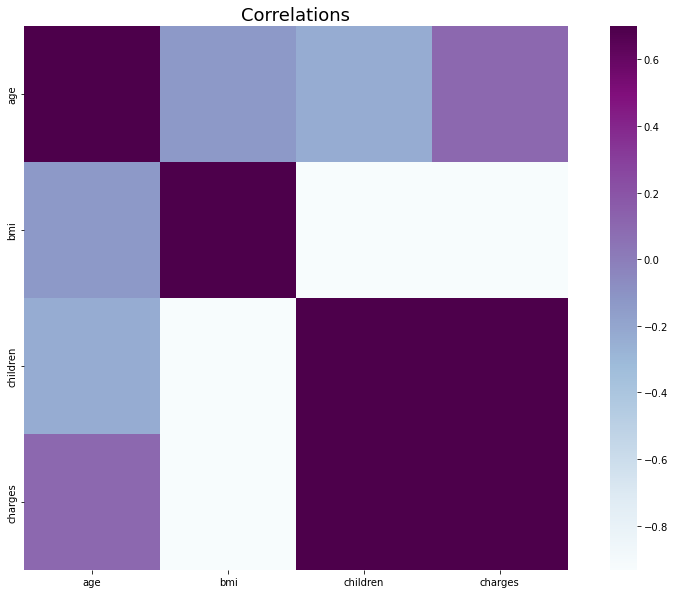

In [109]:
corr = df2.corr()
plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr, cmap="BuPu", vmax=0.7, square=True)
ax.set_title("Correlations", fontsize = 18)

#### Observations:
 The Columns which are not highly corelated are:  
                'MSSubClass',
                'OverallCond',
                'MiscVal',
                '3SsnPorch',
                '1stFlrSF',
                'EnclosedPorch',
                'BsmtFinSF2',
                'BsmtHalfBath',
                'LowQualFinSF'
            
            
The Columns which are highly corelated are:  
               'GarageCars',
                'GarageArea',
                'GrLivArea',
                'OverallQual',
                'TotRmsAbvGrd',
                '1stFlrSF',
                'FullBath',
                'WoodDeckSF',
                'OpenPorchSF',
                'LotArea'
                
                
Columns we can select are:
            'ScreenPorch',
            'HalfBath',
            'KitchenAbvGr',
            

## Converting the dataframe into two numpy arrays

In [62]:
test = pd.read_csv('test1.csv')
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [82]:
df.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [139]:


X = np.array(df[['age', 'bmi']])

y = np.array(df['charges'])

In [140]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [128]:
ls

 Volume in drive C is Windows
 Volume Serial Number is EA1C-322F

 Directory of C:\Users\Ujjwa\OneDrive\Desktop\BDA\Semester 2\CDS\CDS Assignment\Assignment 3\new

17-03-2022  20:12    <DIR>          .
17-03-2022  22:12    <DIR>          ..
17-03-2022  20:11            55,628 insurance.csv
               1 File(s)         55,628 bytes
               2 Dir(s)  162,965,856,256 bytes free


## Spiliting the data into train set and test set

In [141]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Ordinary Least Squares

In [142]:
%matplotlib inline

In [143]:
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.595
Model:                            OLS   Adj. R-squared (uncentered):              0.594
Method:                 Least Squares   F-statistic:                              784.6
Date:                Thu, 17 Mar 2022   Prob (F-statistic):                   2.35e-210
Time:                        22:16:17   Log-Likelihood:                         -11515.
No. Observations:                1070   AIC:                                  2.303e+04
Df Residuals:                    1068   BIC:                                  2.304e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [132]:
print("Analytically computing the parameters:")
print(np.linalg.inv(X_train.T@X_train)@X_train.T@y_train)

Analytically computing the parameters:
[-2.55438364 -0.46633855]


In [133]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("R_squared value: ", res.rsquared)
print("Testing Accuracy:{}".format(r2_score(res.predict(X_test), y_test)))

Parameters:  [-2.55438364 -0.46633855]
Standard errors:  [0.02747432 0.02746312]
R_squared value:  0.9999869612370714
Testing Accuracy:0.007154541348915799


## Gradient Descent

In [116]:
import numpy as np
import matplotlib.pyplot as plt

class Regressor():
    def __init__(self, learning_rate=0.01, tol=0.01, seed=None,normalize=False):
        self.W = None
        self.b = None
        self.__lr = learning_rate
        self.__tol = tol
        self.__length = None
        self.__normalize = normalize
        self.__m = None
        self.__costs = []
        self.__iterations = []
        self.__ws = []
        self.__bs = []
        np.random.seed(seed if seed is not None else np.random.randint(100))

    def __initialize_weights_and_bias(self):
        self.W = np.random.randn(self.__length) #(n,1)
        self.b = 0
        self.__ws.append(self.W)
        self.__bs.append(self.b)

    def __computeCost(self,h,Y):
        loss = np.square(h-Y)
        cost = np.sum(loss)/(2*self.__m)
        return cost

    def __optimize(self,X,Y):
        h = np.dot(X,self.W)+self.b
        dW = np.dot( X.T, (h-Y) ) / self.__m
        db = np.sum( h-Y )  / self.__m
        self.W = self.W - self.__lr*dW
        self.b = self.b - self.__lr*db

    def __normalizeX(self,X):return (X-self.__mean) / (self.__std)

    def fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,i = float('inf'),0
        while True:
            h = np.dot(X,self.W)+self.b
            cost = self.__computeCost(h,y)
            if verbose: print(f"Iteration: {i}, Cost: {cost:.3f}")
            self.__optimize(X,y)
            if last_cost-cost < self.__tol: break
            else: last_cost,i = cost,i+1
            self.__costs.append(cost)
            self.__iterations.append(i)

    def predict(self,X):

        if self.__normalize: X = self.__normalizeX(X)
        return np.dot(X,self.W)+self.b
    
    def seq_fit(self, X, y, verbose=True):
        if self.__normalize:
            self.__mean, self.__std = X.mean(axis=0), X.std(axis=0)
            X = self.__normalizeX(X)
        self.__m,self.__length = X.shape
        self.__initialize_weights_and_bias()
        last_cost,j = float('inf'),0
        while True:
            cost=0
            for i in range(len(X)):
                h = np.dot(X[i],self.W)+self.b
                cost += self.__computeCost(h,y[i])
                self.__optimize(X[i],y[i])

            if verbose: print(f"Iteration: {j}, Cost: {cost:.3f}")
            if last_cost-cost < self.__tol: break
            else: last_cost,j = cost,j+1
            self.__costs.append(cost)
            self.__iterations.append(j)     

    def plot(self,figsize=(7,5)):
        plt.figure(figsize=figsize)
        plt.plot(self.__iterations,self.__costs)
        plt.xlabel('Iterations')
        plt.ylabel('Cost')
        plt.title("Iterations vs Cost")
        plt.show()

    def score(self,X,y):
        return 1-(np.sum(((y-self.predict(X))**2))/np.sum((y-np.mean(y))**2))
  

### Batch Gradient Descent

X_train:(1070, 2)
y_train:(1070,)
Iteration: 0, Cost: 160857946.213
Iteration: 1, Cost: 158927876.794
Iteration: 2, Cost: 157036511.594
Iteration: 3, Cost: 155183073.888
Iteration: 4, Cost: 153366802.553
Iteration: 5, Cost: 151586951.752
Iteration: 6, Cost: 149842790.625
Iteration: 7, Cost: 148133602.993
Iteration: 8, Cost: 146458687.056
Iteration: 9, Cost: 144817355.111
Iteration: 10, Cost: 143208933.264
Iteration: 11, Cost: 141632761.153
Iteration: 12, Cost: 140088191.678
Iteration: 13, Cost: 138574590.733
Iteration: 14, Cost: 137091336.946
Iteration: 15, Cost: 135637821.421
Iteration: 16, Cost: 134213447.489
Iteration: 17, Cost: 132817630.462
Iteration: 18, Cost: 131449797.393
Iteration: 19, Cost: 130109386.836
Iteration: 20, Cost: 128795848.622
Iteration: 21, Cost: 127508643.626
Iteration: 22, Cost: 126247243.548
Iteration: 23, Cost: 125011130.695
Iteration: 24, Cost: 123799797.768
Iteration: 25, Cost: 122612747.653
Iteration: 26, Cost: 121449493.215
Iteration: 27, Cost: 120309557.

Iteration: 619, Cost: 64543538.526
Iteration: 620, Cost: 64543531.270
Iteration: 621, Cost: 64543524.158
Iteration: 622, Cost: 64543517.188
Iteration: 623, Cost: 64543510.356
Iteration: 624, Cost: 64543503.661
Iteration: 625, Cost: 64543497.099
Iteration: 626, Cost: 64543490.667
Iteration: 627, Cost: 64543484.364
Iteration: 628, Cost: 64543478.186
Iteration: 629, Cost: 64543472.131
Iteration: 630, Cost: 64543466.197
Iteration: 631, Cost: 64543460.381
Iteration: 632, Cost: 64543454.681
Iteration: 633, Cost: 64543449.094
Iteration: 634, Cost: 64543443.618
Iteration: 635, Cost: 64543438.252
Iteration: 636, Cost: 64543432.992
Iteration: 637, Cost: 64543427.837
Iteration: 638, Cost: 64543422.785
Iteration: 639, Cost: 64543417.833
Iteration: 640, Cost: 64543412.980
Iteration: 641, Cost: 64543408.224
Iteration: 642, Cost: 64543403.562
Iteration: 643, Cost: 64543398.993
Iteration: 644, Cost: 64543394.515
Iteration: 645, Cost: 64543390.126
Iteration: 646, Cost: 64543385.825
Iteration: 647, Cost

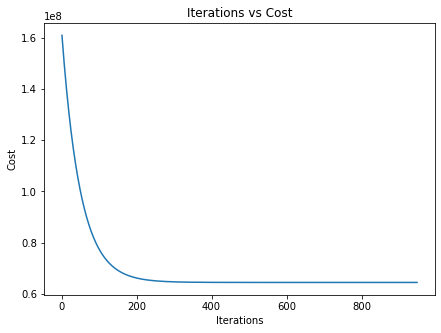

In [144]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

batch_regressor = Regressor(normalize=True)
batch_regressor.fit(X_train,y_train)

train_score = r2_score(batch_regressor.predict(X_train),y_train)
test_score = r2_score(batch_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
batch_regressor.plot()

### Sequential Gradient Descent

X_train:(1070, 2)
y_train:(1070,)
Iteration: 0, Cost: 159904576.514
Iteration: 1, Cost: 158003075.680
Iteration: 2, Cost: 156139516.700
Iteration: 3, Cost: 154313141.950
Iteration: 4, Cost: 152523208.946
Iteration: 5, Cost: 150768990.042
Iteration: 6, Cost: 149049772.131
Iteration: 7, Cost: 147364856.358
Iteration: 8, Cost: 145713557.828
Iteration: 9, Cost: 144095205.337
Iteration: 10, Cost: 142509141.089
Iteration: 11, Cost: 140954720.431
Iteration: 12, Cost: 139431311.594
Iteration: 13, Cost: 137938295.429
Iteration: 14, Cost: 136475065.159
Iteration: 15, Cost: 135041026.130
Iteration: 16, Cost: 133635595.568
Iteration: 17, Cost: 132258202.343
Iteration: 18, Cost: 130908286.737
Iteration: 19, Cost: 129585300.211
Iteration: 20, Cost: 128288705.188
Iteration: 21, Cost: 127017974.828
Iteration: 22, Cost: 125772592.818
Iteration: 23, Cost: 124552053.158
Iteration: 24, Cost: 123355859.957
Iteration: 25, Cost: 122183527.230
Iteration: 26, Cost: 121034578.700
Iteration: 27, Cost: 119908547.

Iteration: 239, Cost: 65324133.087
Iteration: 240, Cost: 65308635.034
Iteration: 241, Cost: 65293445.350
Iteration: 242, Cost: 65278557.898
Iteration: 243, Cost: 65263966.662
Iteration: 244, Cost: 65249665.745
Iteration: 245, Cost: 65235649.369
Iteration: 246, Cost: 65221911.869
Iteration: 247, Cost: 65208447.697
Iteration: 248, Cost: 65195251.410
Iteration: 249, Cost: 65182317.677
Iteration: 250, Cost: 65169641.273
Iteration: 251, Cost: 65157217.075
Iteration: 252, Cost: 65145040.064
Iteration: 253, Cost: 65133105.321
Iteration: 254, Cost: 65121408.022
Iteration: 255, Cost: 65109943.444
Iteration: 256, Cost: 65098706.953
Iteration: 257, Cost: 65087694.011
Iteration: 258, Cost: 65076900.168
Iteration: 259, Cost: 65066321.064
Iteration: 260, Cost: 65055952.425
Iteration: 261, Cost: 65045790.063
Iteration: 262, Cost: 65035829.873
Iteration: 263, Cost: 65026067.831
Iteration: 264, Cost: 65016499.994
Iteration: 265, Cost: 65007122.496
Iteration: 266, Cost: 64997931.551
Iteration: 267, Cost

Iteration: 479, Cost: 64551313.751
Iteration: 480, Cost: 64551189.061
Iteration: 481, Cost: 64551066.854
Iteration: 482, Cost: 64550947.082
Iteration: 483, Cost: 64550829.695
Iteration: 484, Cost: 64550714.647
Iteration: 485, Cost: 64550601.890
Iteration: 486, Cost: 64550491.380
Iteration: 487, Cost: 64550383.071
Iteration: 488, Cost: 64550276.920
Iteration: 489, Cost: 64550172.884
Iteration: 490, Cost: 64550070.920
Iteration: 491, Cost: 64549970.989
Iteration: 492, Cost: 64549873.048
Iteration: 493, Cost: 64549777.059
Iteration: 494, Cost: 64549682.983
Iteration: 495, Cost: 64549590.781
Iteration: 496, Cost: 64549500.417
Iteration: 497, Cost: 64549411.854
Iteration: 498, Cost: 64549325.056
Iteration: 499, Cost: 64549239.987
Iteration: 500, Cost: 64549156.614
Iteration: 501, Cost: 64549074.903
Iteration: 502, Cost: 64548994.821
Iteration: 503, Cost: 64548916.335
Iteration: 504, Cost: 64548839.413
Iteration: 505, Cost: 64548764.025
Iteration: 506, Cost: 64548690.140
Iteration: 507, Cost

Iteration: 722, Cost: 64545115.866
Iteration: 723, Cost: 64545114.984
Iteration: 724, Cost: 64545114.120
Iteration: 725, Cost: 64545113.274
Iteration: 726, Cost: 64545112.446
Iteration: 727, Cost: 64545111.635
Iteration: 728, Cost: 64545110.841
Iteration: 729, Cost: 64545110.064
Iteration: 730, Cost: 64545109.302
Iteration: 731, Cost: 64545108.557
Iteration: 732, Cost: 64545107.827
Iteration: 733, Cost: 64545107.113
Iteration: 734, Cost: 64545106.413
Iteration: 735, Cost: 64545105.728
Iteration: 736, Cost: 64545105.058
Iteration: 737, Cost: 64545104.401
Iteration: 738, Cost: 64545103.758
Iteration: 739, Cost: 64545103.129
Iteration: 740, Cost: 64545102.513
Iteration: 741, Cost: 64545101.910
Iteration: 742, Cost: 64545101.319
Iteration: 743, Cost: 64545100.741
Iteration: 744, Cost: 64545100.175
Iteration: 745, Cost: 64545099.621
Iteration: 746, Cost: 64545099.079
Iteration: 747, Cost: 64545098.548
Iteration: 748, Cost: 64545098.028
Iteration: 749, Cost: 64545097.519
Iteration: 750, Cost

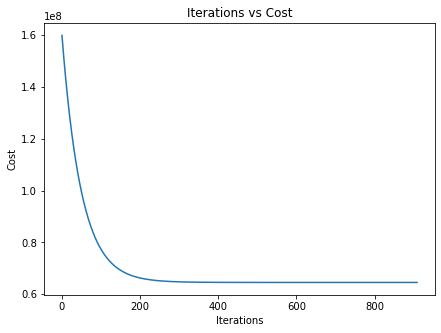

In [145]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

seq_regressor = Regressor(normalize=True)
seq_regressor.seq_fit(X_train,y_train)

train_score = r2_score(seq_regressor.predict(X_train),y_train)
test_score = r2_score(seq_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
seq_regressor.plot()

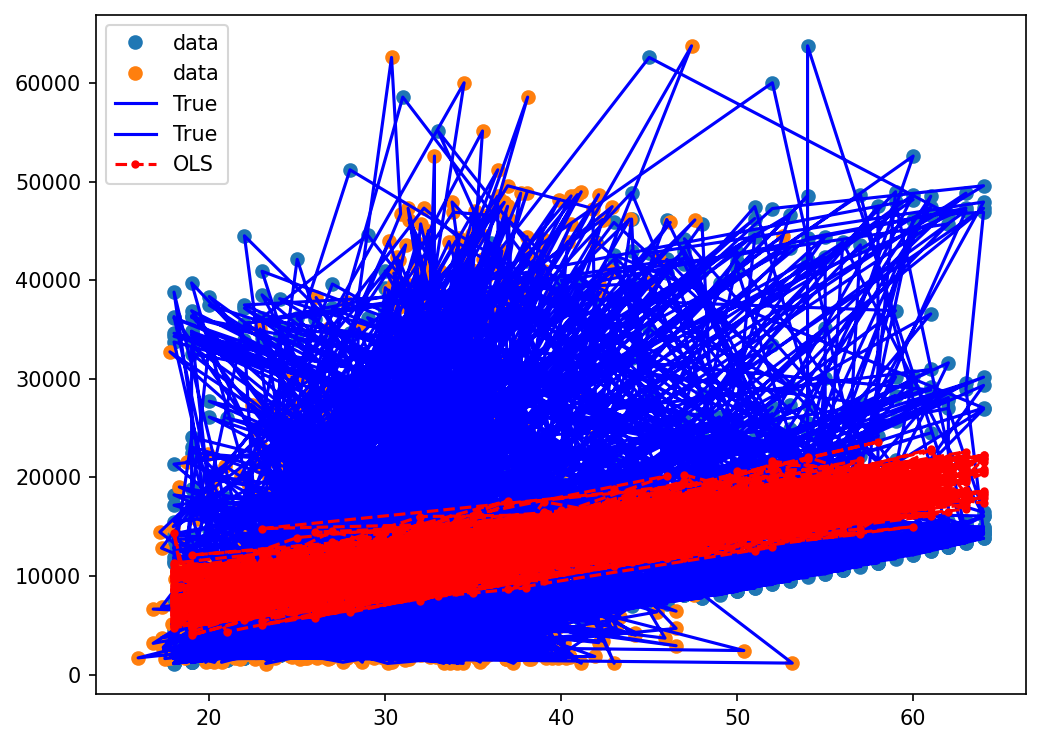

In [146]:
fig, ax = plt.subplots(figsize=(8, 6),dpi=150)

ax.plot(X, y, "o", label="data")
ax.plot(X, y, "b-", label="True")
ax.plot(X_train[:, 0], seq_regressor.predict(X_train), "r--.", label="OLS")
ax.legend(loc="best")
#ax.set_ylim((1.7311,1.7323))